In [2]:
# 1. 파이썬 코드에서 Matplotlib 폰트 설정
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import timedelta
from itertools import combinations
from collections import Counter

# 폰트 설정
plt.rc('font', family='Malgun Gothic')
# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print("한글 폰트 설정이 완료되었습니다.")

# 3. 데이터 로드 및 통합 (모든 문제 풀이의 시작점)
try:
    orders_df = pd.read_csv('../data/orders.csv')
    payments_df = pd.read_csv('../data/payments.csv')
    products_df = pd.read_csv('../data/products.csv')
    shipping_df = pd.read_csv('../data/shipping.csv')
    customers_df = pd.read_csv('../data/customers.csv')

    # 모든 데이터프레임 병합
    df = pd.merge(orders_df, payments_df, on='order_id', how='left')
    df = pd.merge(df, products_df, on='product_id', how='left')
    df = pd.merge(df, customers_df, on='customer_id', how='left')
    df = pd.merge(df, shipping_df, on='order_id', how='left')

    # 데이터 전처리
    date_cols = ['order_date', 'payment_date', 'join_date', 'shipping_start_date', 'shipping_end_date']
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    df['total_sales'] = df['quantity'] * df['price']
    
    print("데이터 로드 및 통합이 완료되었습니다.")

except FileNotFoundError as e:
    print(f"파일을 찾을 수 없습니다: {e}")


한글 폰트 설정이 완료되었습니다.
데이터 로드 및 통합이 완료되었습니다.


In [1]:
# 문제 1: 결제 방법별 사용 빈도와 총 결제액을 비교 분석하세요.
# 시각화: 파이 차트 및 바 차트

# 비즈니스 목적: 고객이 선호하는 결제 수단을 파악하고, 특정 결제 수단에 대한 수수료 협상이나 프로모션(예: OO페이로 결제 시 할인)의 근거 자료로 활용합니다.

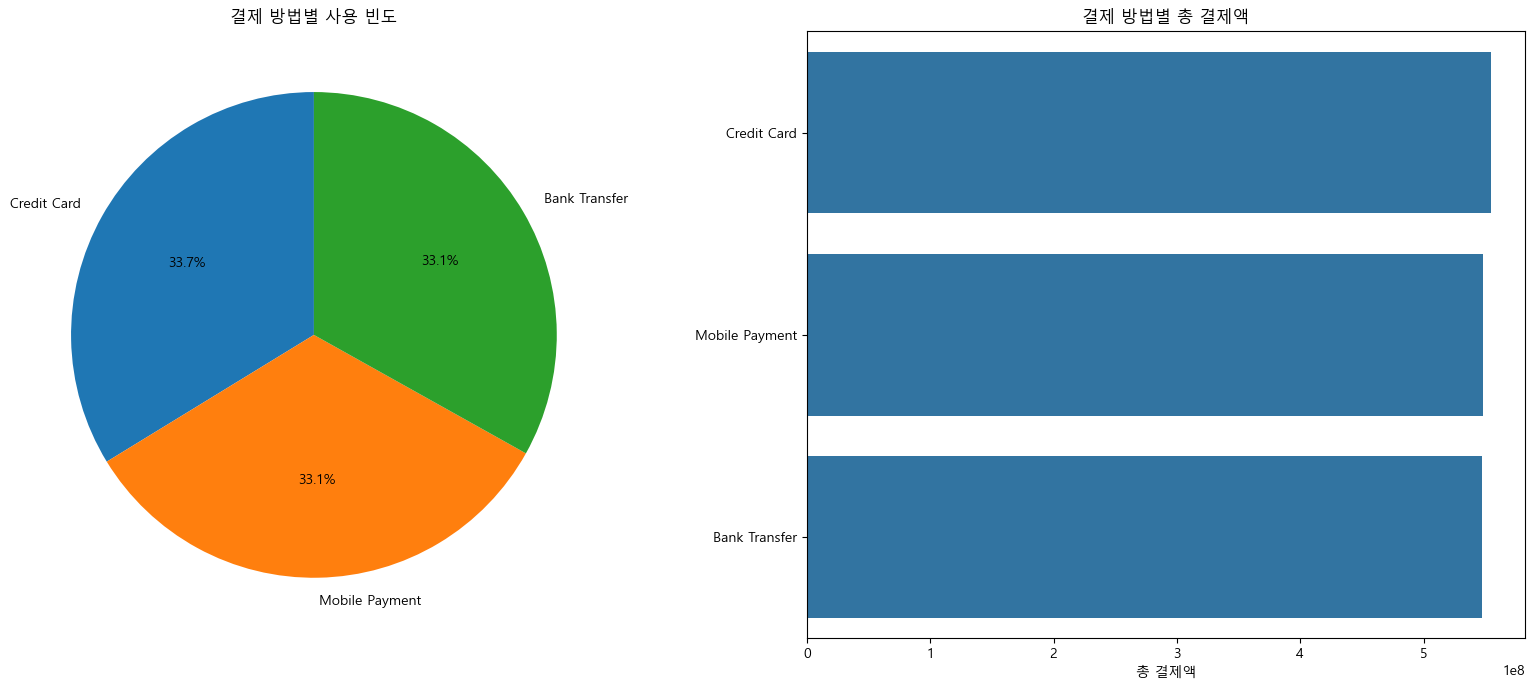

In [3]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 2: 주문 시점부터 결제 완료까지 평균적으로 얼마나 걸리는지 결제 방법별로 분석하세요.
# 시각화: 바 차트

# 비즈니스 목적: 특정 결제 수단에서 결제 지연이 발생하는지 파악하고, 
# 해당 결제 프로세스를 개선하거나 고객에게 예상 소요 시간을 안내하는 데 활용합니다.

결제 방법별 주문-결제 평균 소요 시간 (분):
payment_method
Credit Card       30.312541
Bank Transfer     30.492303
Mobile Payment    30.799532
Name: time_to_payment, dtype: float64


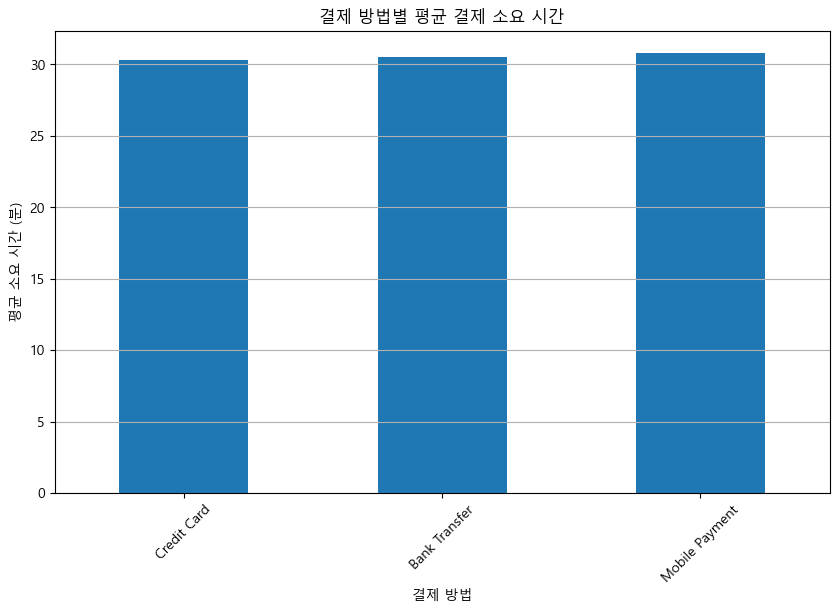

In [4]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 3: 결제 상태(Completed, Pending)별 주문 건수 및 총금액을 비교하세요.
# 비즈니스 목적: 결제 누락(Pending)으로 인해 발생하는 잠재적 매출 손실 규모를 파악하고, 
# 결제 이탈 고객을 대상으로 한 리마인드 마케팅의 필요성을 강조합니다.

In [5]:
# 출력 결과를 보고 코딩하세요







                order_count  total_amount
payment_status                           
Completed              9043    1495903000
Failed                  474      76046900
Pending                 483      78307200


In [ ]:
# 문제 4: 결제가 완료되지 않은(Pending) 주문에서 가장 많이 포함된 상품 상위 5개를 찾으세요.
# 비즈니스 목적: 특정 상품 구매 시 결제 이탈이 빈번하게 발생하는지 파악하고, 
# 해당 상품의 가격, 재고, 상세 페이지 등에 문제가 없는지 점검합니다.

In [6]:
# 출력 결과를 보고 코딩하세요







결제 미완료 주문에 가장 많이 포함된 상품 TOP 5:
product_name
화장품 상품_160     5
스포츠용품 상품_6     4
화장품 상품_256     4
전자제품 상품_159    4
의류 상품_132      4
Name: count, dtype: int64


In [ ]:
# 문제 5: 주문 금액대별로 주로 사용되는 결제 방법을 분석하세요.
# 비즈니스 목적: 고액 결제 시에는 할부 혜택이 많은 '신용카드'가, 
# 소액 결제 시에는 간편한 '모바일 결제'가 선호되는 등 금액에 따른 고객 행동을 파악하고, 
# 결제 옵션 노출 순서 등을 최적화합니다.
# pd.cut() 결제금액을 5개로 나워서 

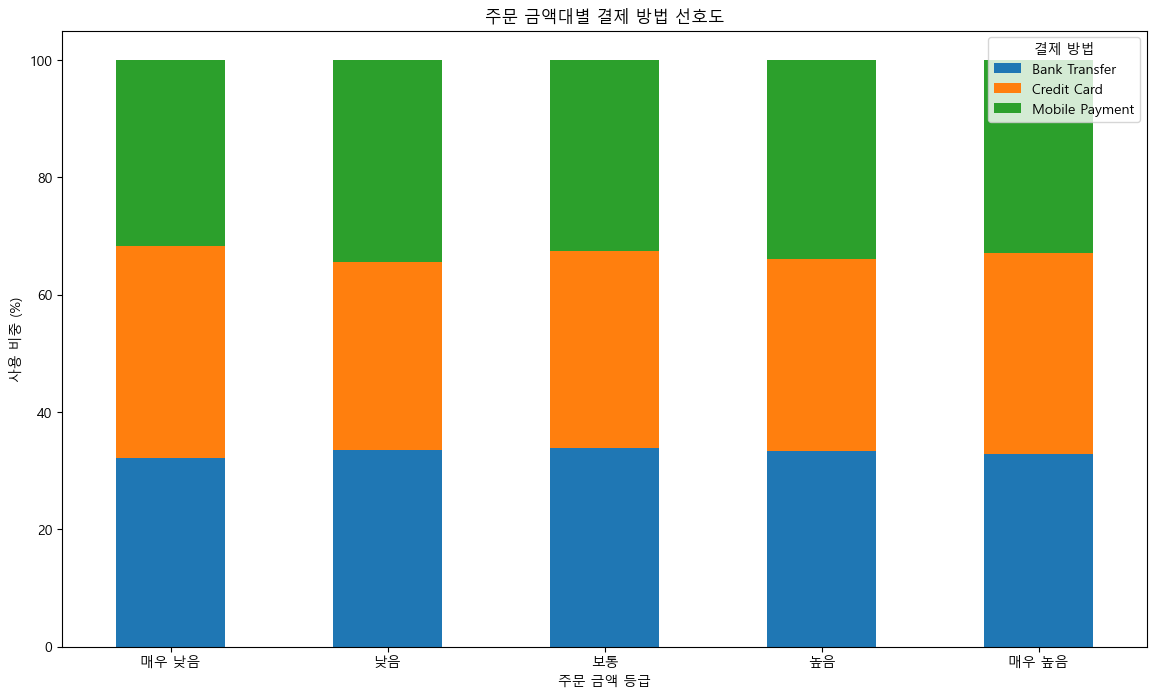

In [9]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 6: 결제가 완료된 주문의 도시별 평균 결제액을 계산하고 상위 10개 도시를 확인하세요.
# 비즈니스 목적: 구매력이 높은 고객이 많이 거주하는 핵심 도시를 파악하고, 
# 해당 지역을 대상으로 한 오프라인 이벤트나 프리미엄 마케팅을 기획합니다.

도시별 평균 결제액 상위 10곳:
city
안양시 만안구     189745.283019
평창군         189444.339623
부천시 오정구     188950.666667
의정부시        188145.217391
안산시 상록구     183401.398601
서산시         182948.507463
평택시         182604.878049
성남시 분당구     181201.123596
고양시 일산서구    180878.688525
화천군         180612.195122
Name: total_sales, dtype: float64


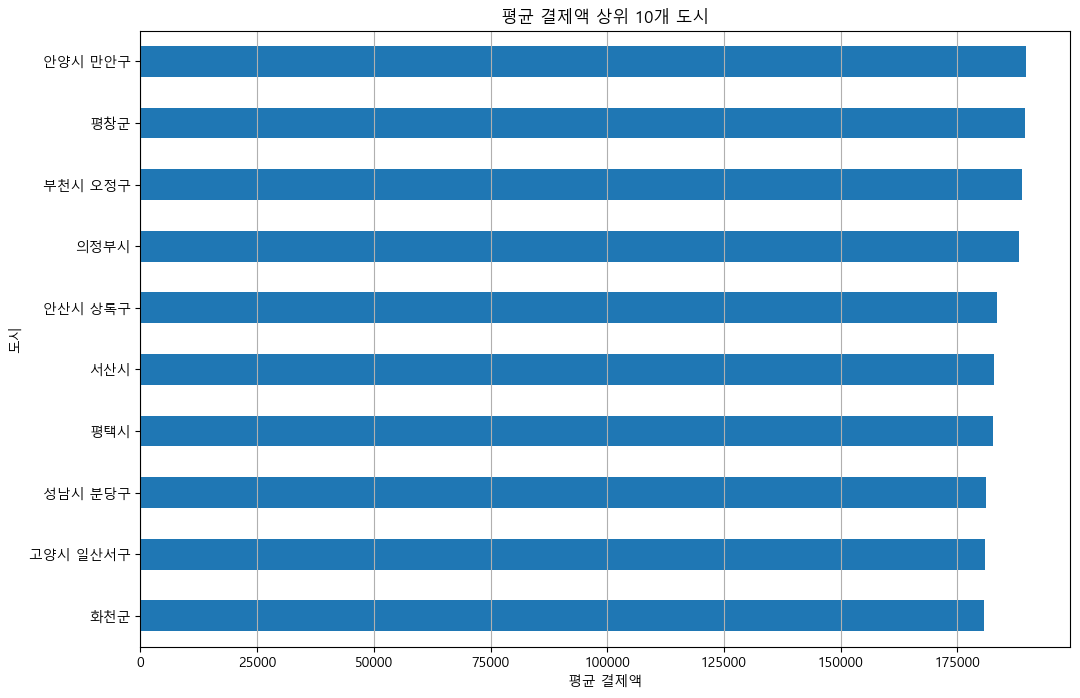

In [12]:
# 출력 결과를 보고 코딩하세요





